In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.cluster import KMeans  
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
## Introduction:
Forecasting future sales is crucial for a retail furniture store to prevent inventory issues. This project 
predicts furniture sales for the next year using time series data from the superstore dataset.

## Objective:
Develop a predictive model leveraging historical sales data to optimize inventory management, reduce stockouts 
or excess inventory, and enhance the overall customer experience.

## Dataset:
Utilizes the superstore dataset with comprehensive time series data on furniture sales for training and 
evaluating the machine learning model.

## Importance:
Accurate sales predictions are vital for retail decision-making, helping maintain supply-demand balance, 
minimize losses, maximize profits, and ensure long-term store sustainability.

## Methodology:
Employs EDA, feature engineering, and tailored machine learning algorithms for time series forecasting, 
aiming for a highly accurate prediction of furniture sales for the next year.

# Conclusion:
This project is crucial for proactive inventory management and sales optimization, empowering the store to 
make informed decisions and provide an exemplary customer experience.
"""

'\n## Introduction:\nForecasting future sales is crucial for a retail furniture store to prevent inventory issues. This project \npredicts furniture sales for the next year using time series data from the superstore dataset.\n\n## Objective:\nDevelop a predictive model leveraging historical sales data to optimize inventory management, reduce stockouts \nor excess inventory, and enhance the overall customer experience.\n\n## Dataset:\nUtilizes the superstore dataset with comprehensive time series data on furniture sales for training and \nevaluating the machine learning model.\n\n## Importance:\nAccurate sales predictions are vital for retail decision-making, helping maintain supply-demand balance, \nminimize losses, maximize profits, and ensure long-term store sustainability.\n\n## Methodology:\nEmploys EDA, feature engineering, and tailored machine learning algorithms for time series forecasting, \naiming for a highly accurate prediction of furniture sales for the next year.\n\n# Conc

Understanding Dataset

In [3]:
data = pd.read_csv("Super_Store_data.csv", encoding='unicode_escape') # Load the dataset

In [5]:
data.shape 
# Total rows and columns

(2121, 21)

In [6]:
# peek at the data
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [7]:
# Last 5 Rows
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [8]:
# cloumns names
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
# categorical and numerical columns
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Checking Components of Time Series

In [10]:
# Catergories in dataset
data['Category'].unique()

array(['Furniture'], dtype=object)

In [11]:
# Subcategories of furniture in dataset
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [12]:
# Types in segment
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
# Dropping of postal code and category
data = data.drop(['Postal Code'], axis=1)
data = data.drop(['Category'], axis=1)

In [14]:
# Peek at the data
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-TA-10001539,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [15]:
# Rename SubCategory to Category
data = data.rename(columns={'Sub-Category': 'Category'})

In [16]:
# Number of products in each category of Funriture
n = data['Category'].nunique()
code = data['Category'].value_counts()
print("Categories of Furniture: ", n)
print("Number of products in each category of Furniture:")
code

Categories of Furniture:  4
Number of products in each category of Furniture:


Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64

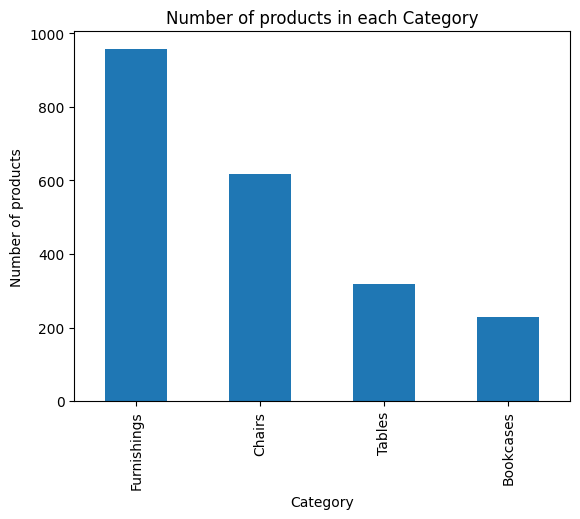

In [17]:
# Total Number of products in each Category
code.plot(kind='bar')
plt.ylabel('Number of products')
plt.xlabel('Category')
plt.title('Number of products in each Category')
plt.show()

In [18]:
# Types regions in dataset
data['Region'].unique()

array(['South', 'West', 'East', 'Central'], dtype=object)

In [19]:
# Types of Ship Mode
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [20]:
# Unique States
data['State'].unique()

array(['Kentucky', 'Florida', 'California', 'Pennsylvania', 'Utah',
       'Texas', 'Indiana', 'New York', 'Illinois', 'Tennessee',
       'South Carolina', 'Minnesota', 'Colorado', 'Washington',
       'Delaware', 'Ohio', 'Wisconsin', 'Michigan', 'New Jersey',
       'Connecticut', 'Massachusetts', 'Mississippi', 'Arizona',
       'Missouri', 'Georgia', 'Virginia', 'Iowa', 'Nebraska',
       'New Hampshire', 'District of Columbia', 'North Carolina',
       'Arkansas', 'Maryland', 'Alabama', 'Nevada', 'Louisiana', 'Oregon',
       'Oklahoma', 'Rhode Island', 'Maine', 'South Dakota', 'New Mexico',
       'Idaho', 'Vermont', 'Kansas', 'Wyoming', 'Montana',
       'West Virginia'], dtype=object)

In [21]:
# Number od unique Values in each column
data.nunique()

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Region              4
Product ID        375
Category            4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64

In [22]:
# Full Summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Region         2121 non-null   object 
 12  Product ID     2121 non-null   object 
 13  Category       2121 non-null   object 
 14  Product Name   2121 non-null   object 
 15  Sales          2121 non-null   float64
 16  Quantity       2121 non-null   int64  
 17  Discount       2121 non-null   float64
 18  Profit  

In [23]:
# Statistical Summary of data
data.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,349.834887,3.785007,0.173923,8.699327
std,2885.740258,503.179145,2.251620,0.181547,136.049246
min,1.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,4416.174000,14.000000,0.700000,1013.127000


In [24]:
# Total Number of null values in each column
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [25]:
# Datatypes of each column
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Product ID        object
Category          object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [26]:
# Number of duplicate values in data
data.duplicated().sum()

0

Forecasting Techniques along with visulization

<Axes: >

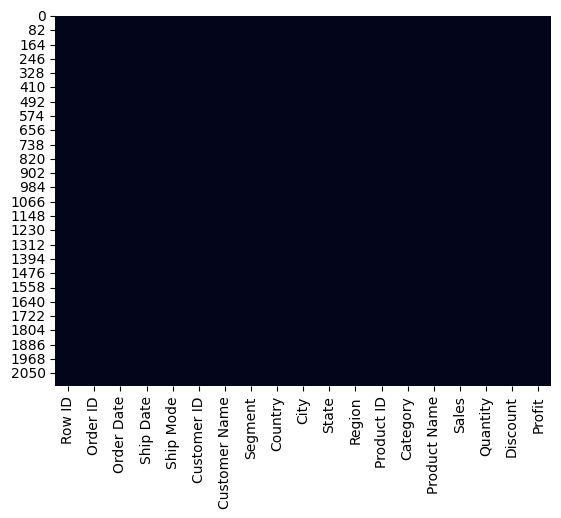

In [27]:
# Visualization of missing values
sns.heatmap(data.isnull(), cbar=False)

In [28]:
# Correlation Matrix
numeric_df = data.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix

,Row ID,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.001696,-0.000246,0.031848,0.008775
Sales,0.001696,1.000000,0.437464,-0.028576,0.173510
Quantity,-0.000246,0.437464,1.000000,-0.015695,0.061213
Discount,0.031848,-0.028576,-0.015695,1.000000,-0.483769
Profit,0.008775,0.173510,0.061213,-0.483769,1.000000


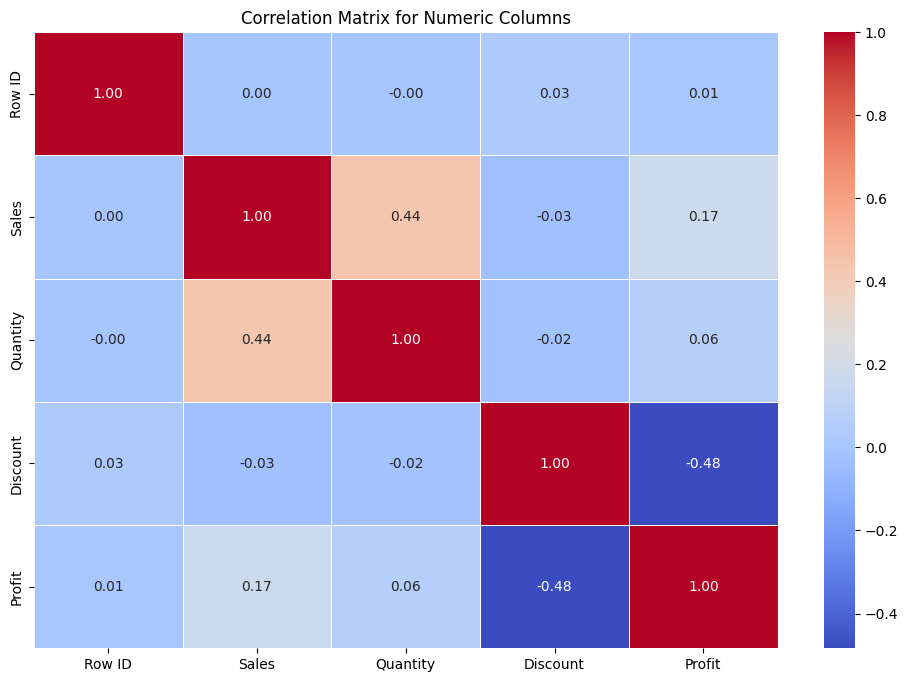

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

In [30]:
# covariance matrix
# provides measure of strength b/w 2 variables or more sets of variables
numeric_df.cov()

,Row ID,Sales,Quantity,Discount,Profit
Row ID,8.327497e+06,2462.060359,-1.595535,16.685215,3444.925387
Sales,2.462060e+03,253189.251776,495.632432,-2.610401,11877.977915
Quantity,-1.595535e+00,495.632432,5.069794,-0.006416,18.751425
Discount,1.668521e+01,-2.610401,-0.006416,0.032959,-11.948784
Profit,3.444925e+03,11877.977915,18.751425,-11.948784,18509.397457


In [31]:
data.iloc[0]

Row ID                                           1
Order ID                            CA-2016-152156
Order Date                               11/8/2016
Ship Date                               11/11/2016
Ship Mode                             Second Class
Customer ID                               CG-12520
Customer Name                          Claire Gute
Segment                                   Consumer
Country                              United States
City                                     Henderson
State                                     Kentucky
Region                                       South
Product ID                         FUR-BO-10001798
Category                                 Bookcases
Product Name     Bush Somerset Collection Bookcase
Sales                                       261.96
Quantity                                         2
Discount                                       0.0
Profit                                     41.9136
Name: 0, dtype: object

In [32]:
data.iloc[:, 0]

0          1
1          2
2          4
3          6
4         11
        ... 
2116    9963
2117    9965
2118    9981
2119    9990
2120    9991
Name: Row ID, Length: 2121, dtype: int64

In [33]:
data.value_counts()
# Summary of data

Row ID  Order ID        Order Date  Ship Date   Ship Mode       Customer ID  Customer Name    Segment      Country        City           State         Region   Product ID       Category     Product Name                                                      Sales    Quantity  Discount  Profit  
1       CA-2016-152156  11/8/2016   11/11/2016  Second Class    CG-12520     Claire Gute      Consumer     United States  Henderson      Kentucky      South    FUR-BO-10001798  Bookcases    Bush Somerset Collection Bookcase                                 261.960  2         0.0        41.9136    1
6714    CA-2017-107629  12/14/2017  12/14/2017  Same Day        DB-13060     Dave Brooks      Consumer     United States  Skokie         Illinois      Central  FUR-FU-10004091  Furnishings  Howard Miller 13" Diameter Goldtone Round Wall Clock              56.328   3         0.6       -26.7558    1
6783    CA-2017-121293  7/25/2017   7/28/2017   Second Class    JC-15775     John Castell     Consumer     U

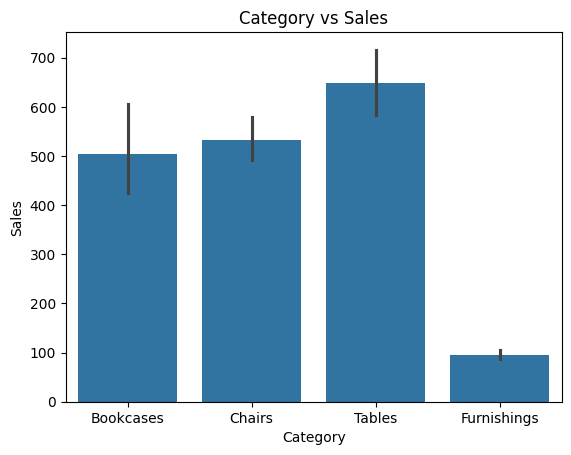

In [34]:
# Plot between catergory and sales
sns.barplot(x='Category', y='Sales', data=data)
plt.title('Category vs Sales')
plt.show()

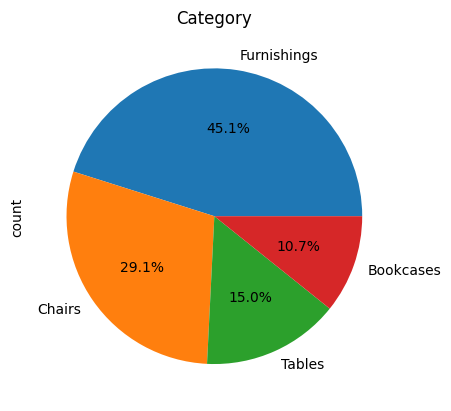

In [35]:
# pie plot of Category
data['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Category')
plt.show()

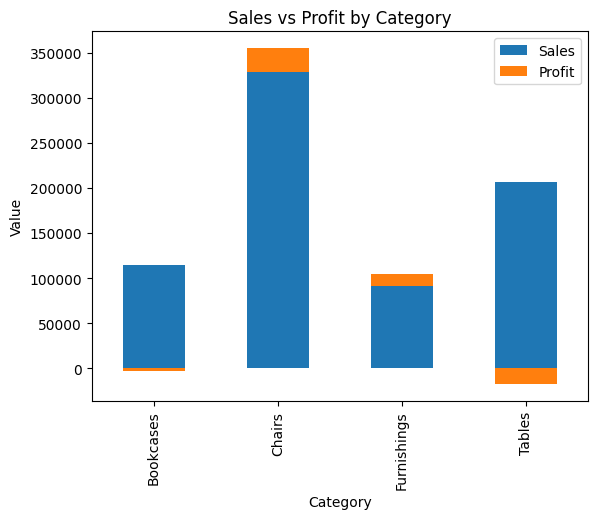

In [36]:
# Bar plot of Sales vs Profit
grouped_data = data.groupby('Category')[['Sales', 'Profit']].sum()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Sales vs Profit by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

State
California              444
New York                236
Texas                   202
Pennsylvania            125
Illinois                123
Washington              114
Ohio                     93
Florida                  85
Virginia                 52
Colorado                 51
Michigan                 50
Arizona                  49
Tennessee                45
North Carolina           42
Massachusetts            33
Georgia                  32
Wisconsin                32
Kentucky                 30
Maryland                 28
New Jersey               26
Indiana                  23
Oregon                   21
Delaware                 18
Rhode Island             16
Oklahoma                 15
Minnesota                13
Connecticut              13
Louisiana                11
Alabama                  11
Missouri                 11
Mississippi               9
Arkansas                  9
Nevada                    9
Utah                      7
New Hampshire             6
South Carolina

Text(0.5, 1.0, 'Count of cities')

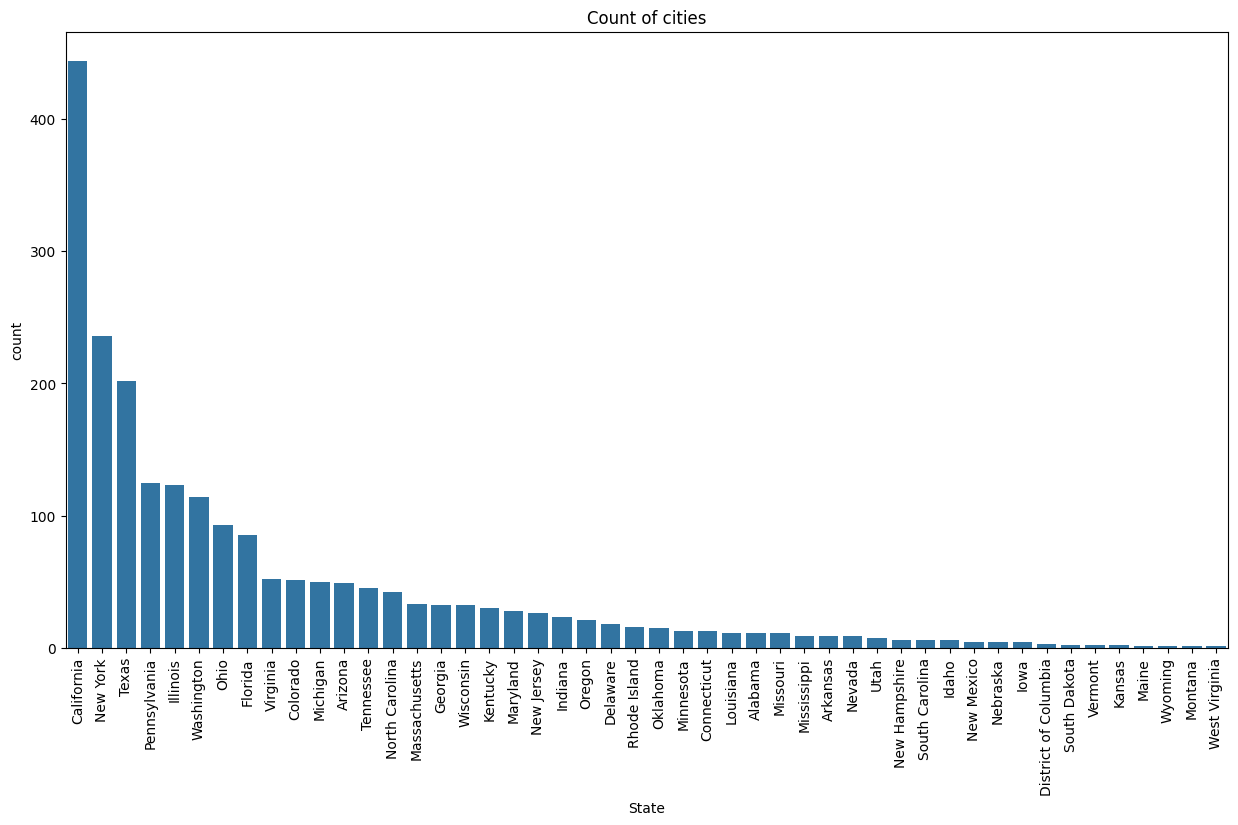

In [37]:
# Count Plot of States 
print(data['State'].value_counts())
plt.figure(figsize=(15, 8))
sns.countplot(x='State', data=data, order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of cities')

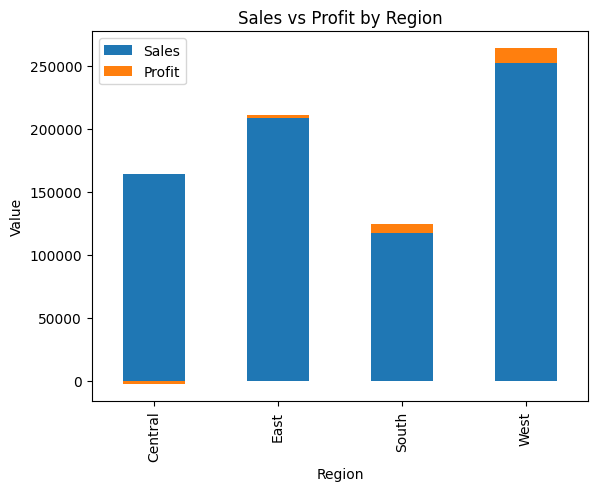

In [38]:
# Sales and profit region wise 
grouped_data = data.groupby('Region')[['Sales', 'Profit']].sum()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Sales vs Profit by Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.show()

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64


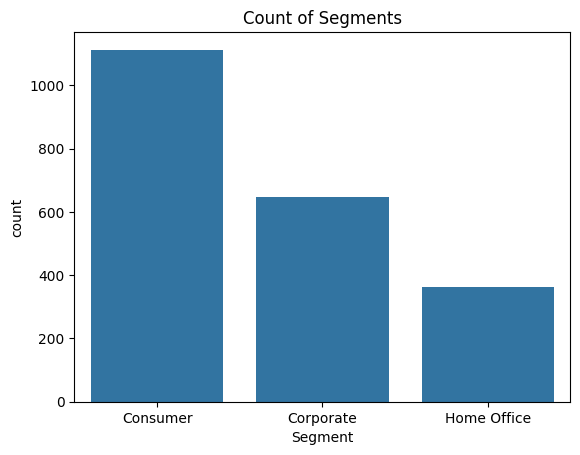

In [39]:
# Count plot of segement
print(data['Segment'].value_counts())
sns.countplot(x='Segment', data=data, order=data['Segment'].value_counts().index)
plt.title("Count of Segments")
plt.show()

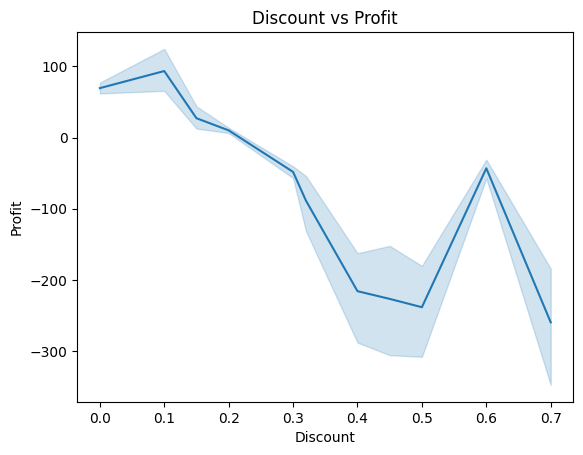

In [40]:
# Line plot of Discount Vs Profit
sns.lineplot(x='Discount', y='Profit', data=data)
plt.title('Discount vs Profit')
plt.show()

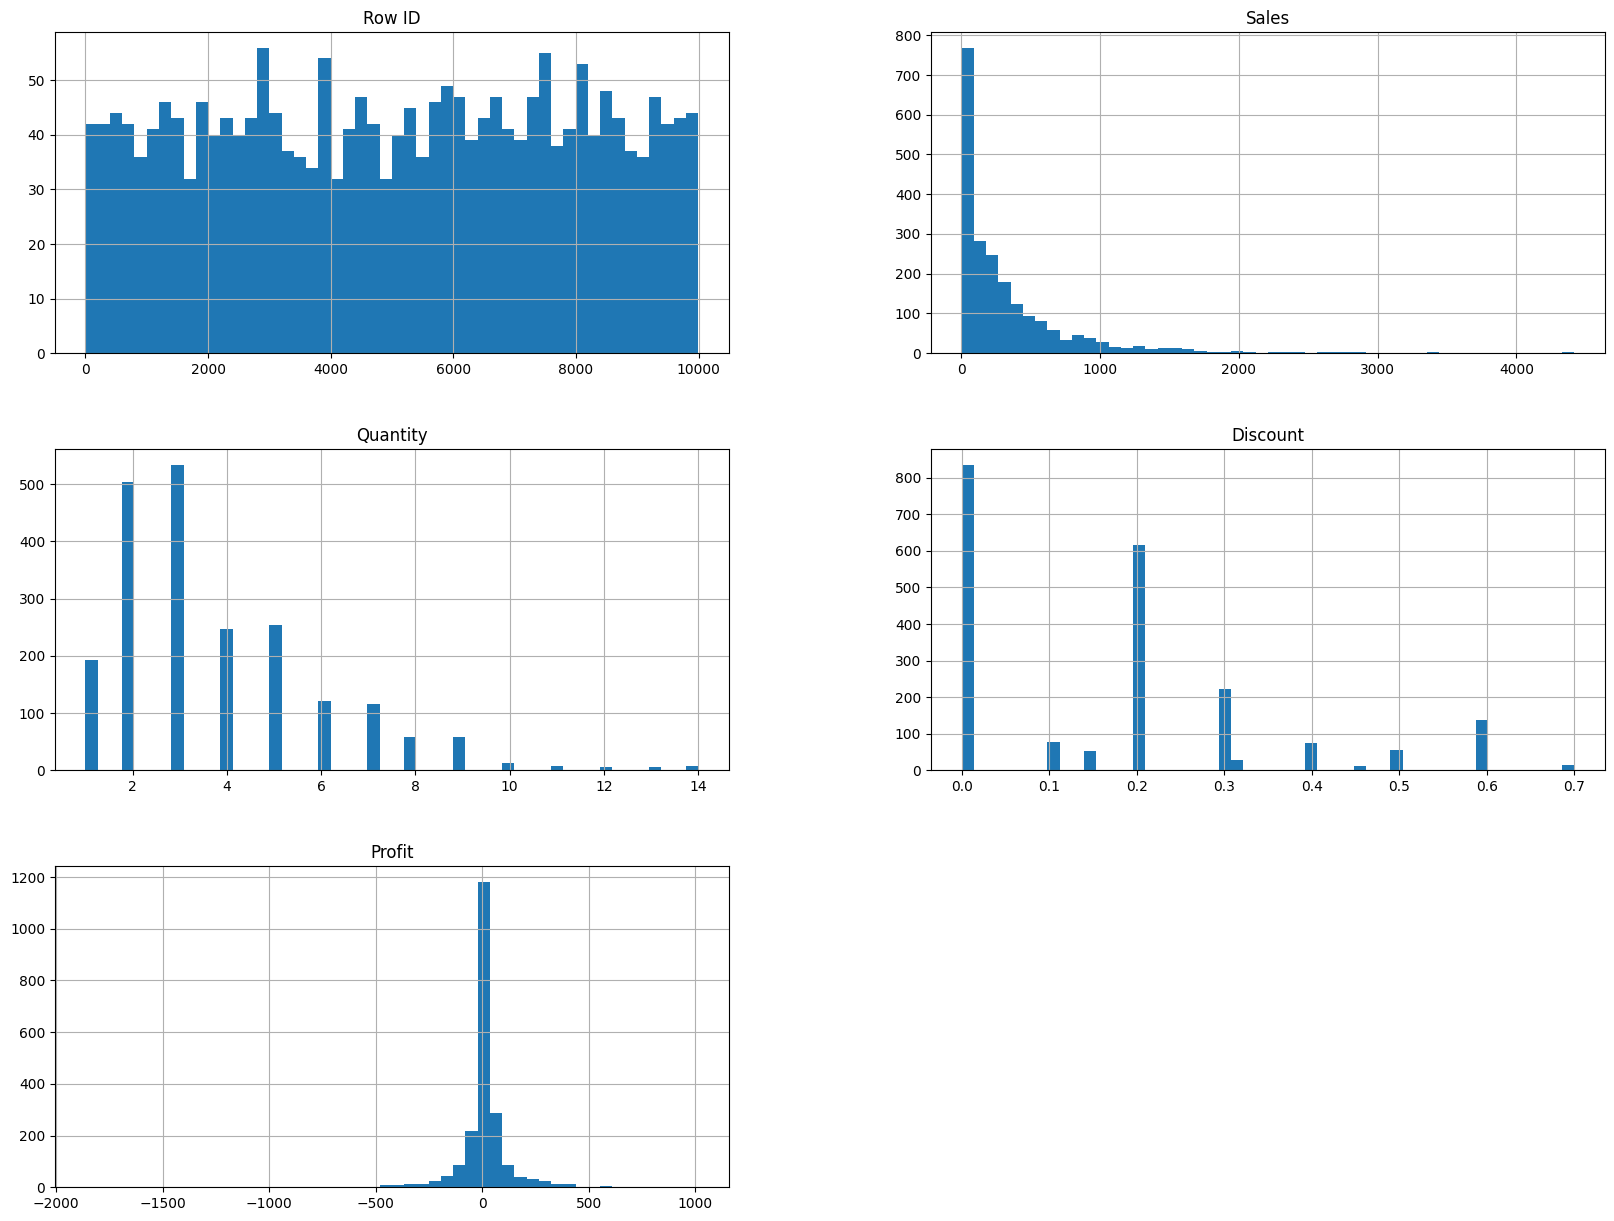

In [41]:
# Histogram
data.hist(bins=50, figsize=(20, 15))
plt.show()

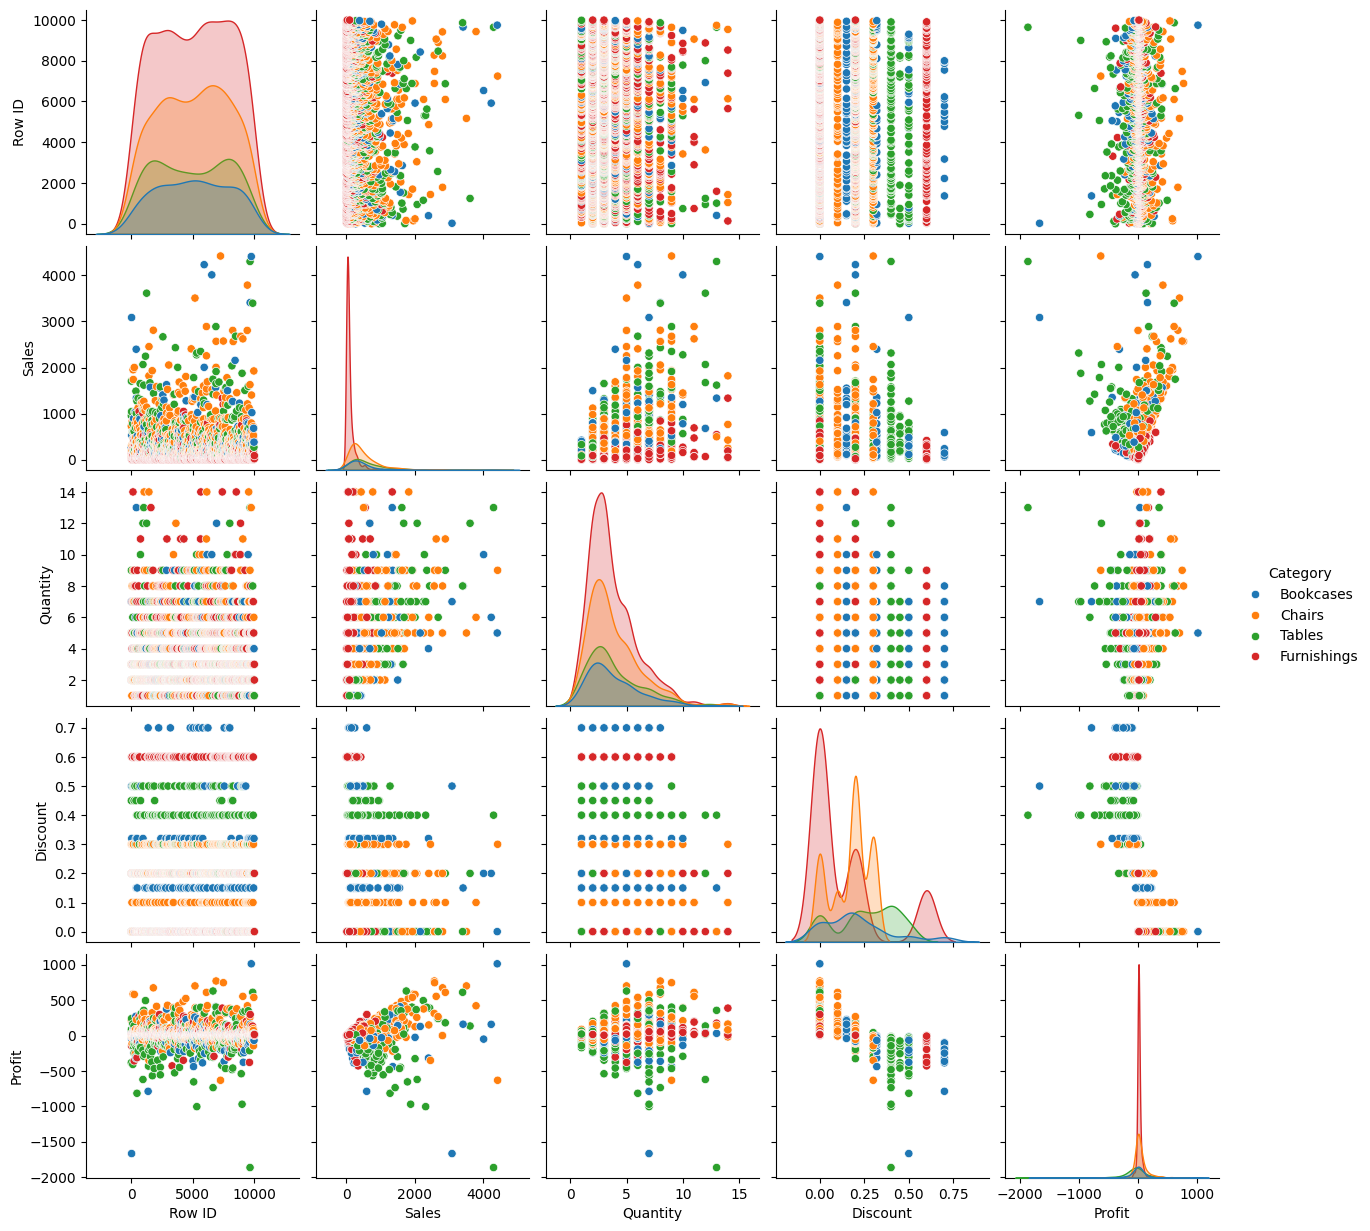

In [42]:
# Pairplot of Category
sns.pairplot(data, hue='Category')
plt.show()

In [43]:
# Statistical Summary of data according to States 
data.groupby('State').Profit.agg(['sum', 'mean', 'min', 'max', 'count', 'median', 'std', 'var'])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,1231.3882,111.944382,2.7776,316.1392,11,70.96440,117.510726,13808.770659
Arizona,-2744.9228,-56.018833,-814.4832,105.2970,49,1.92240,161.120812,25959.916156
Arkansas,781.4552,86.828356,3.9248,224.2674,9,45.29400,83.309734,6940.511818
California,9162.9656,20.637310,-325.5720,297.6900,444,12.12600,57.070753,3257.070878
Colorado,-2683.1342,-52.610475,-786.7440,149.1480,51,3.66600,156.588344,24519.909542
Connecticut,1226.2805,94.329269,-15.5826,294.6710,13,17.32400,118.051584,13936.176442
Delaware,870.7072,48.372622,-48.7839,266.4522,18,16.63740,83.205761,6923.198740
District of Columbia,350.0835,116.694500,15.8256,316.8825,3,17.37540,173.369625,30057.026978
Florida,-2254.9807,-26.529185,-458.1468,131.2785,85,3.77430,97.682123,9541.797193


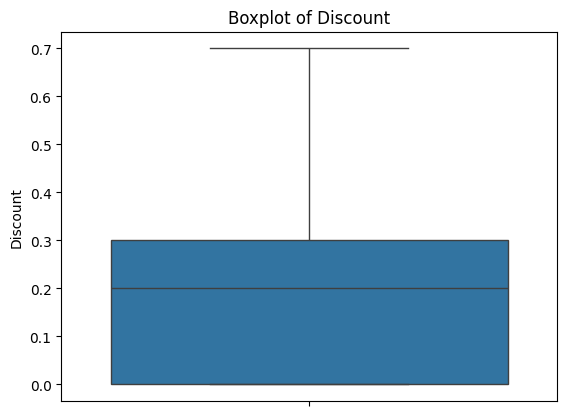

In [44]:
# Box plot of Discount
sns.boxplot(data['Discount'])
plt.title('Boxplot of Discount')
plt.show()

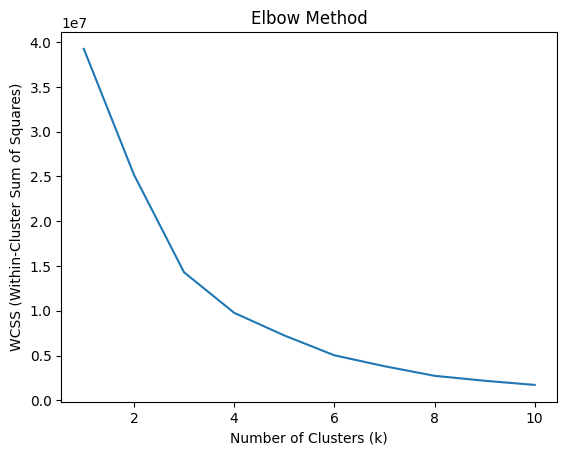

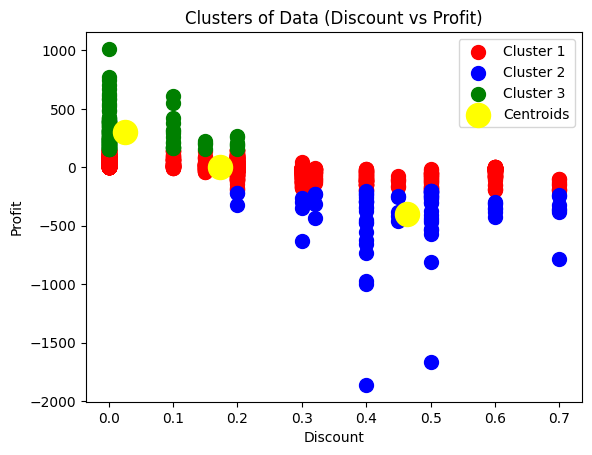

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame
x = data[['Discount', 'Profit']].values

# Using the Elbow Method to find the optimal number of clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, let's choose k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

# Plot the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Data (Discount vs Profit)')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend()
plt.show()


In [46]:
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame

# Mapping function to convert state names to abbreviations
us_state_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Assuming 'data' is your DataFrame
data['State_abb'] = data['State'].map(us_state_to_abbrev)

# Create new column with State Abbreviations
data['State_abb'] = data['State'].map(us_state_to_abbrev)  # Assuming 'us_state_to_abbrev' is a mapping function

# Plot
fig = go.Figure(data=go.Choropleth(
    locations=data['State_abb'],
    z=data['State_abb'].value_counts(),
    locationmode='USA-states',
    colorscale='teal',
    zmin=1,
    zmax=1000
))

fig.update_layout(
    font=dict(size=14),
    title={
        'text': "Number of Customers by State Map",
        'y': 0.95,
        'x': 0.5
    },
    geo_scope='usa'
)

fig.show()
